## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
pip install xlrd>=1.0.0

Note: you may need to restart the kernel to use updated packages.


# Loading the US Home Price Index dataset

In [3]:
df = pd.read_excel("US Home Price Index.xlsx")

In [4]:
df.head()

,Date,Construction Materials Index,Federal Funds Rate,GDP per capita,Subsidy ( bn$),Mortgage,Disposable Personal Income (bn$),Urban Population ( percent ),Total Households,Unemployment Rate,SPI
0,2006-07-01,221.9,5.24,54886,28.604,6.7625,11746.9,80.099,114384.0,4.7,183.068
1,2006-08-01,221.9,5.25,54886,28.604,6.5240,11737.0,80.099,114384.0,4.7,182.594
2,2006-09-01,222.4,5.25,54886,28.604,6.4025,11800.1,80.099,114384.0,4.5,182.798
3,2006-10-01,223.1,5.25,55216,28.604,6.3575,11853.7,80.099,114384.0,4.4,183.198
4,2006-11-01,223.9,5.25,55216,28.604,6.2400,11901.9,80.099,114384.0,4.5,183.609


In [5]:
column_names = df.columns
print("Columns in DataFrame:")
print(column_names)

Columns in DataFrame:
Index(['Date', 'Construction Materials Index', 'Federal Funds Rate',
       'GDP per capita', 'Subsidy ( bn$)', 'Mortgage',
       'Disposable Personal Income (bn$)', 'Urban Population ( percent )',
       'Total Households', 'Unemployment Rate', 'SPI'],
      dtype='object')


### Imputation of Missing Values

In [6]:
missing_values = df.isnull().sum()
print("Missing values in all column:")
print(missing_values)

Missing values in all column:
Date                                  0
Construction Materials Index        131
Federal Funds Rate                    0
GDP per capita                        0
Subsidy ( bn$)                       11
Mortgage                              0
Disposable Personal Income (bn$)      1
Urban Population ( percent )         11
Total Households                      2
Unemployment Rate                     0
SPI                                   2
dtype: int64


In [7]:
median_1 = df['Construction Materials Index'].median()
df['Construction Materials Index'].fillna(median_1, inplace=True)

In [8]:
median_2 = df['Subsidy ( bn$)'].median()
df['Subsidy ( bn$)'].fillna(median_2, inplace=True)

In [9]:
median_3 = df['Disposable Personal Income (bn$)'].median()
df['Disposable Personal Income (bn$)'].fillna(median_3, inplace=True)

In [10]:
median_4 = df['Total Households'].median()
df['Total Households'].fillna(median_4, inplace=True)

In [11]:
median_5 = df['Urban Population ( percent )'].median()
df['Urban Population ( percent )'].fillna(median_5, inplace=True)

In [12]:
median_6 = df['SPI'].median()
df['SPI'].fillna(median_6, inplace=True)

In [13]:
missing_values = df.isnull().sum()
print("Missing values in all column:")
print(missing_values)

Missing values in all column:
Date                                0
Construction Materials Index        0
Federal Funds Rate                  0
GDP per capita                      0
Subsidy ( bn$)                      0
Mortgage                            0
Disposable Personal Income (bn$)    0
Urban Population ( percent )        0
Total Households                    0
Unemployment Rate                   0
SPI                                 0
dtype: int64


# Exploratory Data Analysis

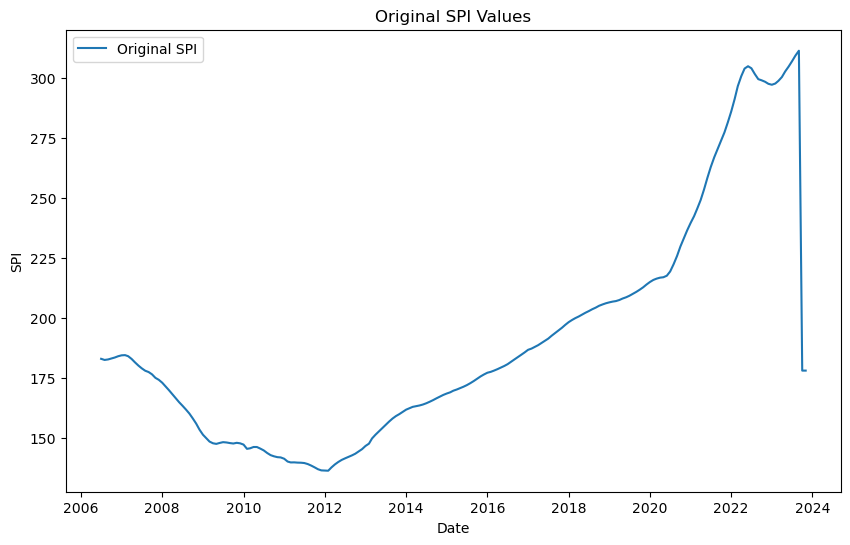

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SPI'], label='Original SPI')
plt.title('Original SPI Values')
plt.xlabel('Date')
plt.ylabel('SPI')
plt.legend()
plt.show()

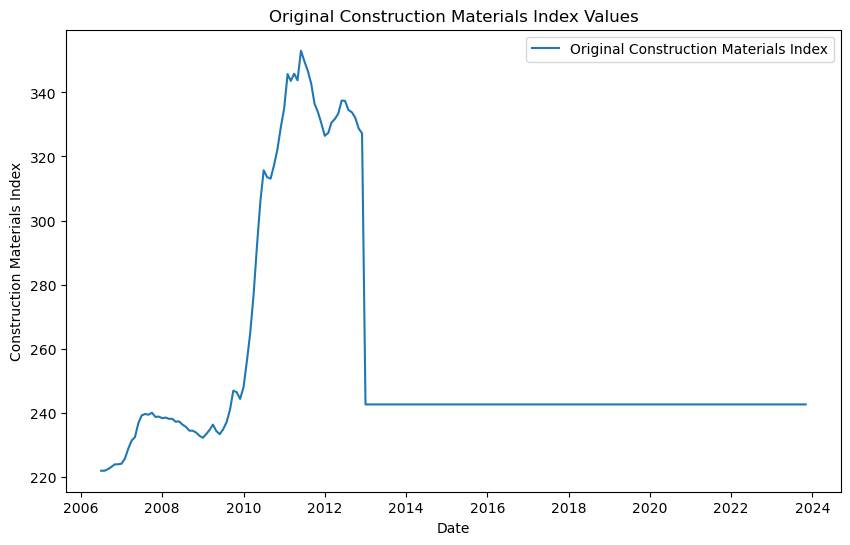

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Construction Materials Index'], label='Original Construction Materials Index')
plt.title('Original Construction Materials Index Values')
plt.xlabel('Date')
plt.ylabel('Construction Materials Index')
plt.legend()
plt.show()

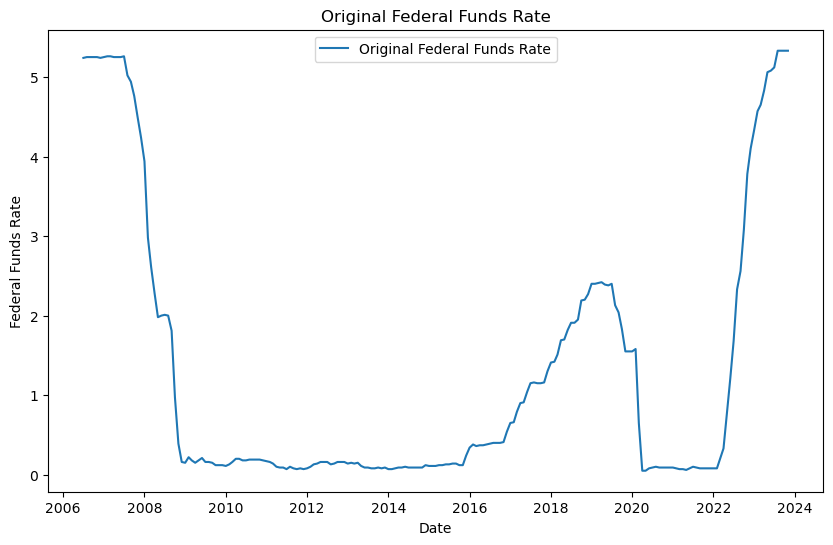

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Federal Funds Rate'], label='Original Federal Funds Rate')
plt.title('Original Federal Funds Rate')
plt.xlabel('Date')
plt.ylabel('Federal Funds Rate')
plt.legend()
plt.show()

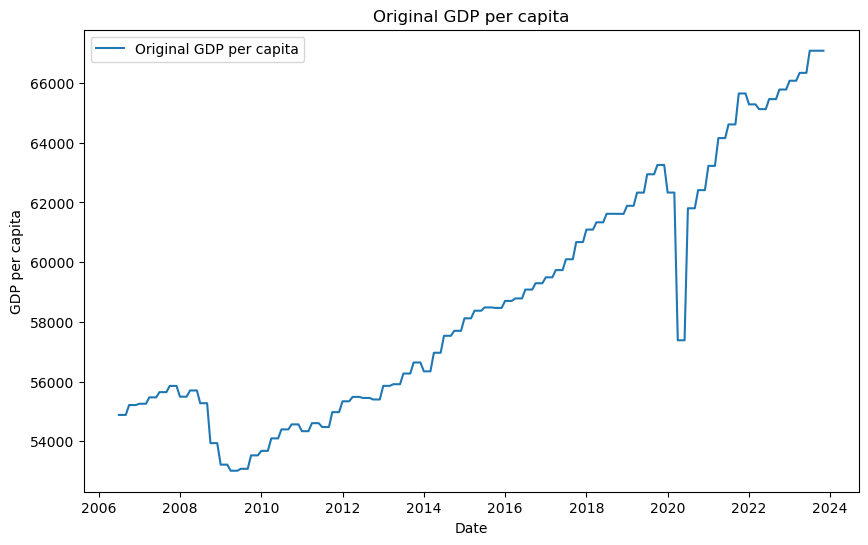

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['GDP per capita'], label='Original GDP per capita')
plt.title('Original GDP per capita')
plt.xlabel('Date')
plt.ylabel('GDP per capita')
plt.legend()
plt.show()

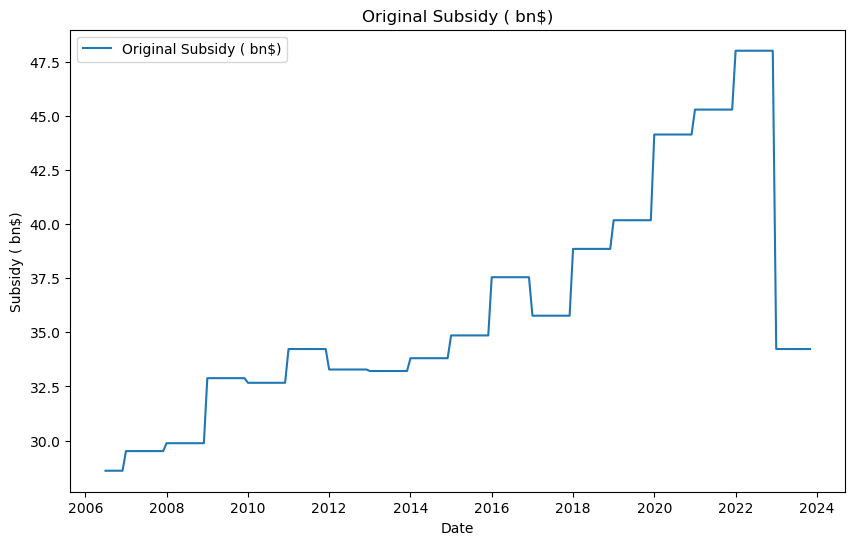

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Subsidy ( bn$)'], label='Original Subsidy ( bn$)')
plt.title('Original Subsidy ( bn$)')
plt.xlabel('Date')
plt.ylabel('Subsidy ( bn$)')
plt.legend()
plt.show()

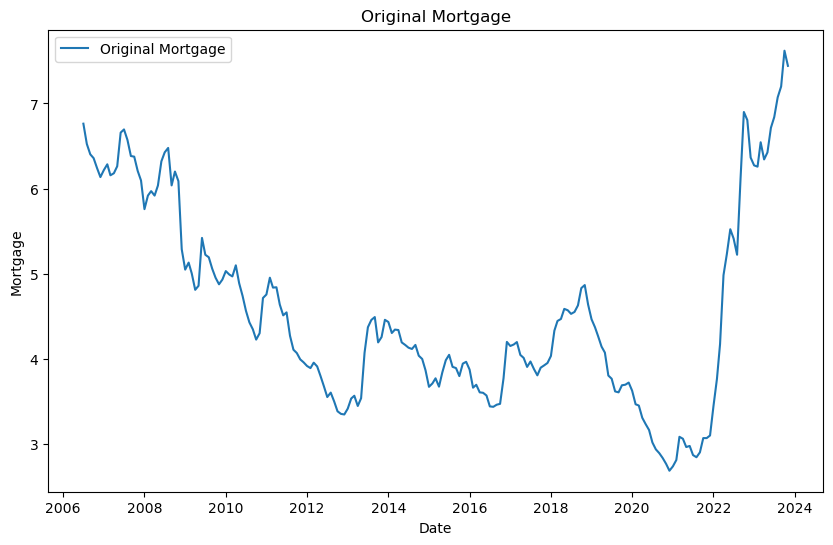

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Mortgage'], label='Original Mortgage')
plt.title('Original Mortgage')
plt.xlabel('Date')
plt.ylabel('Mortgage')
plt.legend()
plt.show()

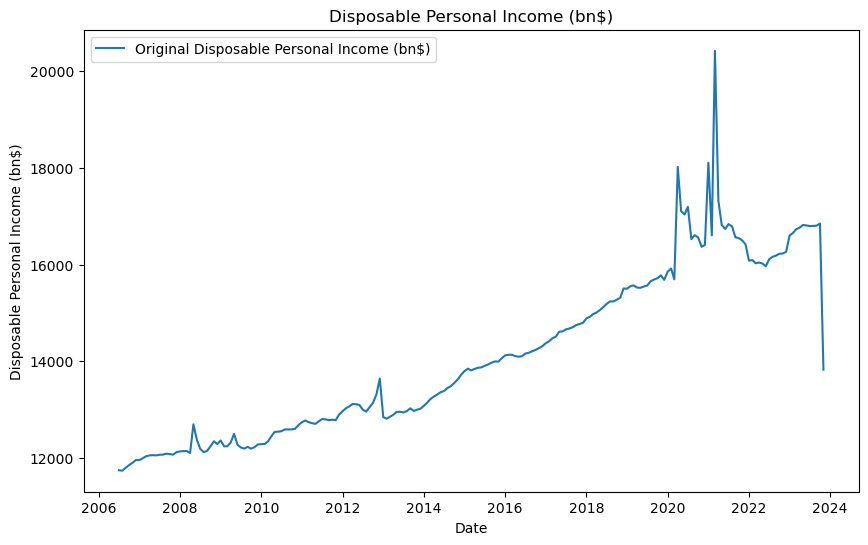

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Disposable Personal Income (bn$)'], label='Original Disposable Personal Income (bn$)')
plt.title('Disposable Personal Income (bn$)')
plt.xlabel('Date')
plt.ylabel('Disposable Personal Income (bn$)')
plt.legend()
plt.show()

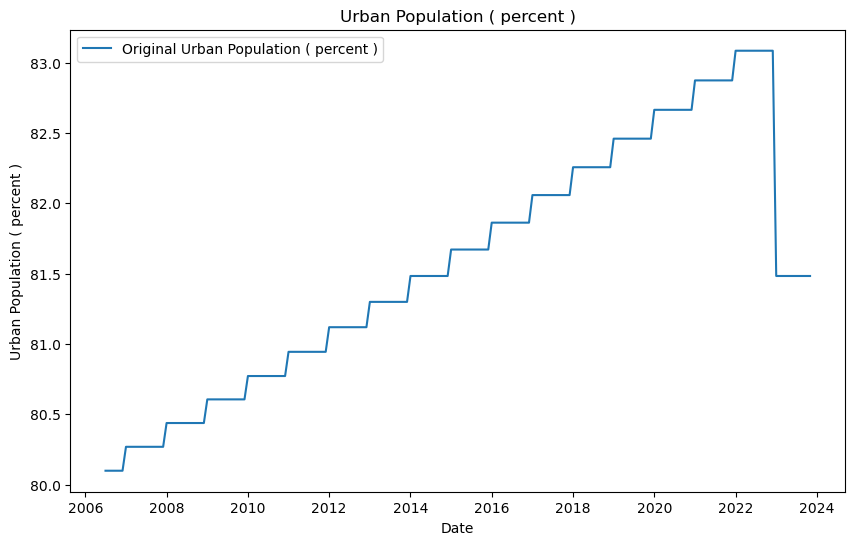

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Urban Population ( percent )'], label='Original Urban Population ( percent )')
plt.title('Urban Population ( percent )')
plt.xlabel('Date')
plt.ylabel('Urban Population ( percent )')
plt.legend()
plt.show()

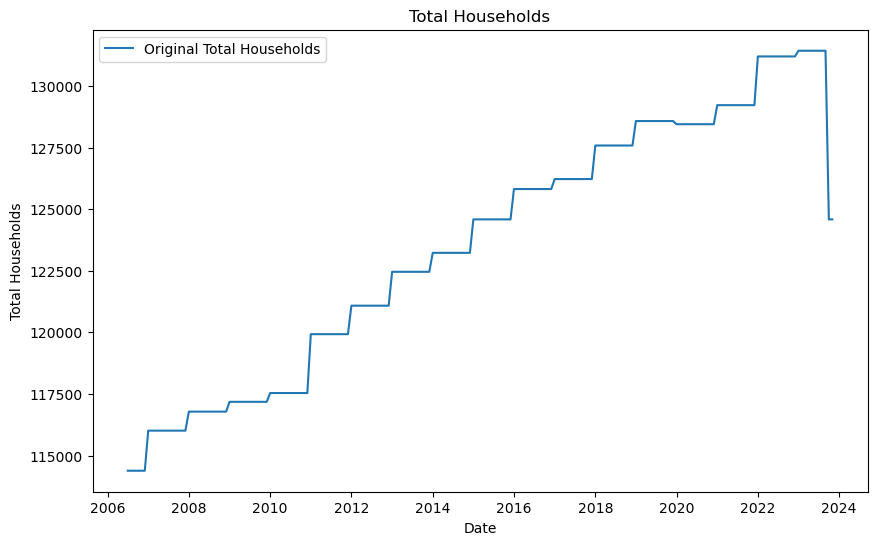

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Total Households'], label='Original Total Households')
plt.title('Total Households')
plt.xlabel('Date')
plt.ylabel('Total Households')
plt.legend()
plt.show()

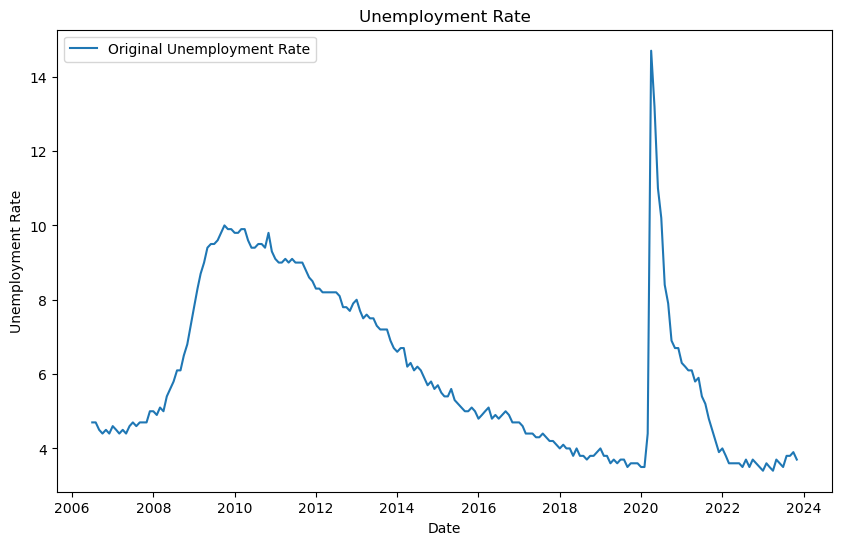

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Unemployment Rate'], label='Original Unemployment Rate')
plt.title('Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()

# ARIMA Model

In [24]:
model = sm.tsa.ARIMA(df['SPI'], order=(1, 1, 1))
result = model.fit()

In [25]:
future_steps = 12
forecast = result.get_forecast(steps=future_steps)

## Predicting SPI

In [26]:
forecast_values = forecast.predicted_mean
forecast_dates = pd.date_range(df['Date'].iloc[-1] + pd.DateOffset(months=1), periods=future_steps, freq='MS')

## Plotting Original and Forecasted SPI Values in same graph

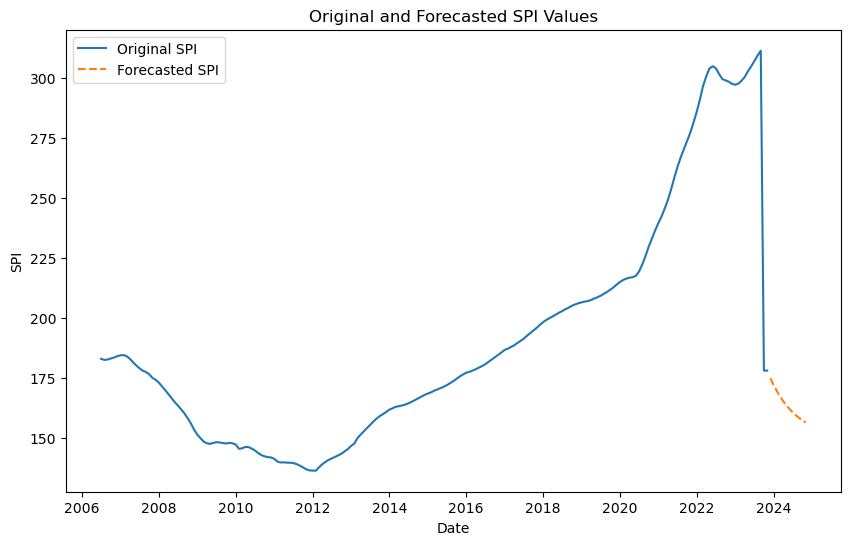

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SPI'], label='Original SPI')
plt.plot(forecast_dates, forecast_values, label='Forecasted SPI', linestyle='dashed')
plt.title('Original and Forecasted SPI Values')
plt.xlabel('Date')
plt.ylabel('SPI')
plt.legend()
plt.show()

## Forecasted Values of SPI for next 12 months

In [28]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_SPI': forecast_values})
print("\nForecasted SPI Values:")
print(forecast_df)


Forecasted SPI Values:
          Date  Forecasted_SPI
209 2023-12-01      174.996574
210 2024-01-01      172.181888
211 2024-02-01      169.680659
212 2024-03-01      167.457979
213 2024-04-01      165.482827
214 2024-05-01      163.727638
215 2024-06-01      162.167915
216 2024-07-01      160.781890
217 2024-08-01      159.550220
218 2024-09-01      158.455714
219 2024-10-01      157.483098
220 2024-11-01      156.618797
